# Project : Wrangle and Analyze Data - Udacity

## Contents
1. [Gathering Data](#Gather_data)
1. [Assess Data](#Assess_data)
1. [Clean Data](#Clean_data)
1. [Store, Analyze & Visualize Data](#AnalyzeVisualize_data)


### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import os 
import tweepy
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Gather Data <a id='Gather_data'></a>

### Twitter Archive

**Load .csv file containing tweets with additional info**

In [2]:
df_twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions

In [3]:
# Predictions of dog breeds
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
# Create dataframe from TSV
df_image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')


### Twitter API

In [4]:
consumer_key = 'XX'
consumer_secret = 'XX'
access_token = 'XX'
access_secret = 'XX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
# List of the tweets
df_list = []
# List of error tweets
df_error = []
# Calculate execution time
start = time.time()

# A for loop which will add each available tweet json to df_list
for tweet_id in df_twitter_archived['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended',
                              wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json
        retweets = tweet['retweet_count']
        likes = tweet['favorite_count']
        date_time = tweet['created_at']
        user_likes = tweet['user']['favourites_count']
        
        
        df_list.append({'tweet_id': int(tweet_id), 
                        'likes': int(likes), 
                        'date_time': pd.to_datetime(date_time),
                       'user_likes' : int(user_likes),
                       'retweets': int(retweets)})
    except Exception as e:
        print(str(tweet_id)+ "_"+ str(e))
        df_error.append(int(tweet_id))
#Calculation of total execution time
end = time.time()
print(start - end)

888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937_[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130_[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778_[{'code': 144, 'message': 'No sta

In [17]:
# length of the obtained results
print("The length of the results is", len(df_list))

The length of the results is 2331


In [6]:
# length of the error list
print("The length of the errors is", len(df_error))

The length of the errors is 25


In [7]:
# Create DataFrame from dictionary
tweets_json = pd.DataFrame(df_list, columns = ['tweet_id', 'likes', 'user_likes', 'date_time', 'retweets'])

# Safe dataframe to file
tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index = False)

In [8]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')



## Assess Data <a id='Assess_data'></a>

#### Assess twitter archived dataframe

In [9]:
df_twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_twitter_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_twitter_archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_twitter_archived.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None


#### Assess image prediction file

In [13]:
df_image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [14]:
df_image_predictions.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1743,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,1,malinois,0.332897,True,Chihuahua,0.104116,True,Staffordshire_bullterrier,0.047745,True


In [15]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Assess tweet data 

In [17]:
tweet_data.head(2)

,tweet_id,likes,user_likes,date_time,retweets
0,892420643555336193,36075,146140,2017-08-01 16:23:56,7680
1,892177421306343426,31123,146140,2017-08-01 00:17:27,5681


In [18]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id      2331 non-null int64
likes         2331 non-null int64
user_likes    2331 non-null int64
date_time     2331 non-null object
retweets      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [19]:
tweet_data[tweet_data.tweet_id.duplicated()]

,tweet_id,likes,user_likes,date_time,retweets


In [20]:
tweet_data.likes.mean()

7534.1072501072504

In [21]:
df_twitter_archived.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Description quality and tidiness of the twitter archived data, images and twitter counts dataset: 

**Find 8 quality issues in the different data quality dimensions:**
1. Completeness
  - tweed_id is an int (archive dataset)
  - missing data in the following columns: in_reply_to_user_id, in_reply_to_status_id, retweeted_status_user_id, retweeted_status_user_id, retweeted_status_timestamp (archive dataset)
1. Validity
  - Names of dog are sometimes just one letter or 'None' (archive dataset)
1. Accuracy
  - timestamp is an object (archive dataset)
1. Consistency
  - Difficult to interpret ratings (archive dataset)
  - Duplicated tweets
  - text column in archive contains both text and short link (archive dataset)
  - Various unnecessary image predition columns (image prediction dataset)


**Find 2 tidiness issues:**

1. Each variable forms a column
2. Each observation forms a row
3. Each observation unit forms a table

1. The columns 'dogoo', 'floofer', 'pupper', 'puppo' all relate to the same variable (archive dataset)
2.  The images and twitter_count dataset all relate to the same table (archive, images and twitter count dataset)

## Clean data <a id='Clean_data'></a>
  - Define 
  - Code
  - Test

In [22]:
# Make a copy of the table before starting to clean
archive_clean = df_twitter_archived.copy()
images_clean = df_image_predictions.copy()
twitter_clean = tweet_data.copy()

In [23]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id      2331 non-null int64
likes         2331 non-null int64
user_likes    2331 non-null int64
date_time     2331 non-null object
retweets      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


### QUALITIY ISSUE - 1. Define: Change tweet_id from an integer to a string
### QUALITIY ISSUE - 1. Code:  Change tweet_id from an integer to a string:


In [24]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)
twitter_clean.tweet_id =twitter_clean.tweet_id.astype(str)



### QUALITIY ISSUE - 1. Test:  Change tweet_id from an integer to a string:

In [25]:
print(archive_clean.info())
print(images_clean.info())
print(twitter_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### QUALITIY ISSUE - 2. Define: Remove unnecesarry columns in archive_clean table
### QUALITIY ISSUE - 2. Code: Remove unnecesarry columns in archive_clean table:

In [26]:
archive_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 'in_reply_to_status_id'],
                                   axis = 1, 
                                   inplace = True)

### QUALITIY ISSUE - 2. Test:  Remove unnecesarry columns in archive_clean table:

In [27]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### QUALITIY ISSUE - 3. Define: Correcting dog naming issues 
### QUALITIY ISSUE - 3. Code:  Correcting dog naming issues:

In [28]:
archive_clean.name = archive_clean.name.str.replace('^[a-z]+', 'NaN')
archive_clean.name = archive_clean.name.str.replace('None', 'NaN')

### 3. Test: Correcting dog naming issues:

In [29]:
archive_clean.name.value_counts()

NaN             854
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
Sadie             8
Toby              7
Daisy             7
Buddy             7
Bailey            7
Oscar             6
Jack              6
Milo              6
Bella             6
Leo               6
Dave              6
Scout             6
Stanley           6
Jax               6
Koda              6
Rusty             6
Sammy             5
Finn              5
Larry             5
George            5
               ... 
Oreo              1
Sonny             1
Bayley            1
Rorie             1
Glenn             1
DonDon            1
Jebberson         1
Pawnd             1
Simba             1
Benny             1
Pluto             1
Rueben            1
Tedrick           1
Alexanderson      1
Mabel             1
Bruno             1
Aiden             1
Severus           1
Dallas            1


### QUALITIY ISSUE - 4. Define: Timestamps to datetime format
### QUALITIY ISSUE - 4. Code:  Timestamps to datetime format:

In [30]:
archive_clean['timestamp'] = archive_clean['timestamp'].str.slice(0,-6)

In [31]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### QUALITIY ISSUE - 4. Test: Timestamps to datetime format:

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 276.2+ KB


### QUALITIY ISSUE - 5. Define: Standardize rating by calculating the value of the numerator divided by the denominator and save this in the column 'rating'
### QUALITIY ISSUE - 5. Code: Standardize rating by calculating the value of the numerator divided by the denominator and save this in the column 'rating'

In [33]:
archive_clean['rating'] = archive_clean['rating_numerator']/ archive_clean['rating_denominator']

### QUALITIY ISSUE - 5. Test: :

In [34]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3


### QUALITIY ISSUE - 6. Define: Keep only the rows with Nan retweeted, remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp 
### QUALITIY ISSUE - 6. Code: Keep rows with Nan retweeted, remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp 

In [35]:
# Keep columns where 'retweeted_status_id' is NaN
archive_clean = archive_clean[np.isnan(archive_clean.retweeted_status_id)]



In [36]:
# Remove retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp 
archive_clean = archive_clean.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

### QUALITIY ISSUE - 6. Test: Standardize rating by calculating the value of the numerator divided by the denominator and save this in the column 'rating' :

In [37]:
# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
rating                2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 237.9+ KB


### QUALITIY ISSUE - 7. Define: Create a function to remove links and apply it to achive_clean.text.
### QUALITIY ISSUE - 7. Code:  Create a function to remove links and apply it to achive_clean.text:

In [38]:
def remove_link(link):
        http_pos = link.find("http")
        # If no link, retain row
        if http_pos == -1:
            link = link
        else:
            # Remove space before link to end
            link = link[:http_pos - 1]
        return link

In [39]:
archive_clean.text = archive_clean.text.apply(remove_link)

### QUALITIY ISSUE - 7. Test: Create a function to remove links and apply it to achive_clean.text:

In [40]:
# Print full text to verify the endings
for text in archive_clean.text[:5]:
    print(text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


### QUALITIY ISSUE - 8. Define: Replace unnecesarry image prediction columns by 1 column
### QUALITIY ISSUE - 8. Code: Replace unnecesarry image prediction columns by 1 column:

In [41]:
# Append the prediction that is true to the list of 'predictions' 
# and append the level of confidence to the list 'confidence_level', if not possible, append Nan

predictions = []
confidence_level = []

def predictions_func(df):
    if df['p1_dog'] == True:
        predictions.append(df['p1'])
        confidence_level.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        predictions.append(df['p2'])
        confidence_level.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        predictions.append(df['p3'])
        confidence_level.append(df['p3_conf']) 
    else:
        predictions.append('NaN')
        confidence_level.append(0)

images_clean.apply(predictions_func, axis = 1)
images_clean['dog_breed'] = predictions
images_clean['Confidence_level'] = confidence_level

# Delete unnecesarry columns
images_clean = images_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


# Unify capital letters within the prediction
images_clean['dog_breed']=images_clean['dog_breed'].str.title()


### QUALITIY ISSUE - 8. Test: Replace unnecesarry image prediction columns by 1 column:

In [54]:
images_clean.head(3)

,tweet_id,jpg_url,dog_breed,Confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,0.596461


### TIDINESS ISSUE -  1. Create one column for the various dog types -  doggo, floofer, pupper, puppo 
### TIDINESS ISSUE - 1. Code: Create one column for the various dog types -  doggo, floofer, pupper, puppo:

In [42]:
archive_clean['dog_type'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_clean.dog_type.value_counts()
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2,NaN


In [43]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### TIDINESS ISSUE - 1. Test: Create one column for the various dog types -  doggo, floofer, pupper, puppo:

In [44]:
archive_clean.sample(8)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type
1656,683357973142474752,2016-01-02 18:43:31,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",https://twitter.com/dog_rates/status/683357973...,10,10,NaN,1.0,NaN
1121,730924654643314689,2016-05-13 00:56:32,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,https://twitter.com/dog_rates/status/730924654...,9,10,NaN,0.9,NaN
1620,684940049151070208,2016-01-07 03:30:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Oreo. She's a photographer and a model...,https://twitter.com/dog_rates/status/684940049...,12,10,Oreo,1.2,NaN
1079,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,NaN,1.3,doggo
26,886983233522544640,2017-07-17 16:17:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,1.3,NaN
1572,687664829264453632,2016-01-14 15:57:26,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,1.1,NaN
1013,747219827526344708,2016-06-27 00:07:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,1.1,NaN
524,809220051211603969,2016-12-15 02:14:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyro. He's a Stratocumulus Flop. Tongu...,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,1.2,NaN


### TIDINESS ISSUE - 2. Define: Merge clean version of archive, images and twitter count dataframes
### TIDINESS ISSUE - 2. Code: Merge clean version of archive, images and twitter count dataframes:

In [45]:
archive_images_clean = pd.merge(left = archive_clean, right = images_clean, 
                                left_on = 'tweet_id', right_on = 'tweet_id', 
                                how = 'inner')
archive_images_twitter_clean = archive_images_clean.merge(twitter_clean,
                                                         on = 'tweet_id',
                                                         how = 'inner')


### TIDINESS ISSUE - 2. Test: Merge clean version of archive, images and twitter count dataframes:

In [46]:
archive_images_twitter_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type,jpg_url,dog_breed,Confidence_level,likes,user_likes,date_time,retweets
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Nan,0.000000,36075,146140,2017-08-01 16:23:56,7680
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,31123,146140,2017-08-01 00:17:27,5681


## Storing, Analyzing & Visualizing Data  <a id='AnalyzeVisualize_data'></a>


In [47]:
# Stroing the df to a new csv file
archive_images_twitter_clean.to_csv('twitter_archive_master.csv', index=False)
twitter_dogs = pd.read_csv('twitter_archive_master.csv')

**Provide 3 insights and 1 visualization** 


**#1 Analyze & visualize the most popular dog breed**

In [48]:
twitter_dogs.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type,jpg_url,dog_breed,Confidence_level,likes,user_likes,date_time,retweets
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Nan,0.000000,36075,146140,2017-08-01 16:23:56,7680
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,31123,146140,2017-08-01 00:17:27,5681


In [61]:
twitter_dogs['dog_breed'].value_counts()

Nan                            308
Golden_Retriever               158
Labrador_Retriever             106
Pembroke                        95
Chihuahua                       91
Pug                             62
Toy_Poodle                      50
Chow                            48
Pomeranian                      42
Samoyed                         41
Malamute                        33
Chesapeake_Bay_Retriever        31
French_Bulldog                  30
Cocker_Spaniel                  30
Miniature_Pinscher              25
Eskimo_Dog                      22
Cardigan                        21
German_Shepherd                 21
Siberian_Husky                  20
Shih-Tzu                        20
Beagle                          20
Staffordshire_Bullterrier       20
Maltese_Dog                     19
Shetland_Sheepdog               19
Rottweiler                      19
Lakeland_Terrier                18
Kuvasz                          18
Italian_Greyhound               17
Basset              

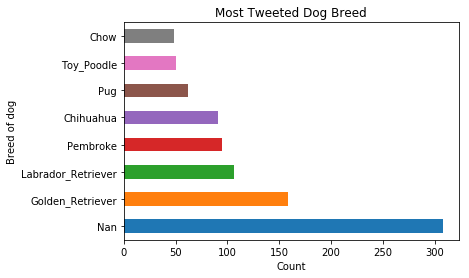

In [49]:
dog_breed_graph = twitter_dogs.groupby('dog_breed').filter(lambda x: len(x) >= 45)
dog_breed_graph['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Tweeted Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

**The most common dogbreed is Golden Retriever, followed by Labrador Retriever.**

**#2 Analyze & visualize the most popular dog name**

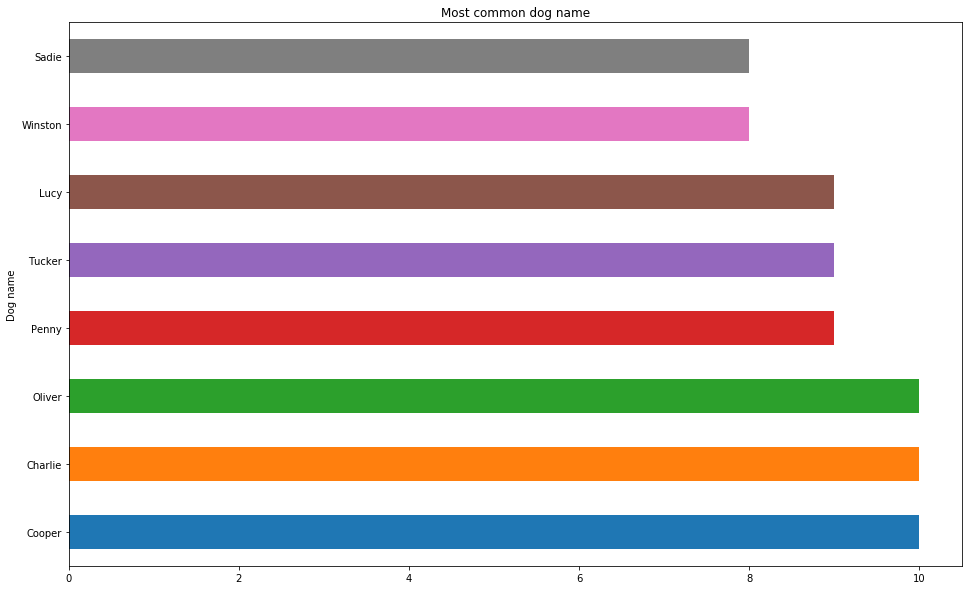

In [50]:
twitter_dogs.name.value_counts()[0:8].plot('barh', figsize = (16,10), 
                                           title ='Most common dog name')
plt.ylabel('Dog name');

**Observation: The most common dog names are Charlie, Cooper, Oliver.**

**#3 What is the relation between Likes & Retweets?**

Text(0.5,1,'Retweets_vs Likes')

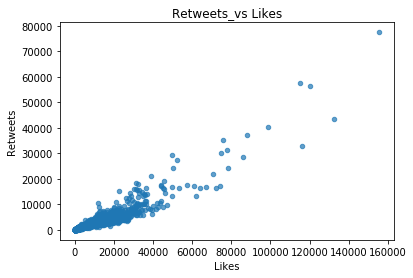

In [51]:
twitter_dogs.plot(kind = 'scatter', 
                  x = 'likes', y = 'retweets', 
                  alpha = 0.7)
plt.ylabel('Retweets')
plt.xlabel('Likes')
plt.title('Retweets_vs Likes')

**Observation: Retweets are positively correlated with the amount of likes given.** 

**#4 What is the most frequent reported dog stage?**

In [52]:
twitter_dogs['dog_type'].value_counts()

pupper     223
doggo       71
puppo       27
floofer      3
Name: dog_type, dtype: int64

Text(0.5,1,'Frequency of the four different dog stages')

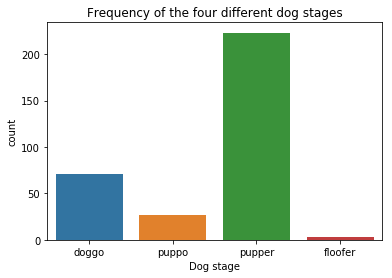

In [53]:
sns.countplot(data=twitter_dogs, x = 'dog_type')
plt.xlabel('Dog stage')
plt.title('Frequency of the four different dog stages', size=12)

**Observation: The most frequent reporte dog stage is a pupper, followed by doggo, puppo and floofer.**